In [1]:
%matplotlib inline


# Regularized OT with generic solver


Illustrates the use of the generic solver for regularized OT with
user-designed regularization term. It uses Conditional gradient as in [6] and
generalized Conditional Gradient as proposed in [5][7].


[5] N. Courty; R. Flamary; D. Tuia; A. Rakotomamonjy, Optimal Transport for
Domain Adaptation, in IEEE Transactions on Pattern Analysis and Machine
Intelligence , vol.PP, no.99, pp.1-1.

[6] Ferradans, S., Papadakis, N., Peyré, G., & Aujol, J. F. (2014).
Regularized discrete optimal transport. SIAM Journal on Imaging Sciences,
7(3), 1853-1882.

[7] Rakotomamonjy, A., Flamary, R., & Courty, N. (2015). Generalized
conditional gradient: analysis of convergence and applications.
arXiv preprint arXiv:1510.06567.






In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

Generate data
-------------



In [3]:
#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = ot.datasets.get_1D_gauss(n, m=20, s=5)  # m= mean, s= std
b = ot.datasets.get_1D_gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

Solve EMD
---------



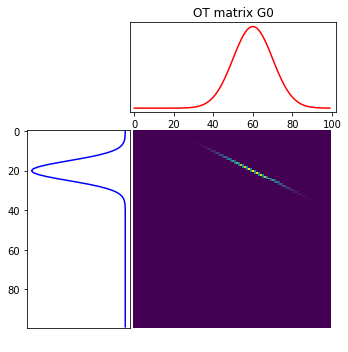

In [4]:
#%% EMD

G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

Solve EMD with Frobenius norm regularization
--------------------------------------------



It.  |Loss        |Delta loss
--------------------------------
    0|1.760578e-01|0.000000e+00
    1|1.669467e-01|-5.457501e-02
    2|1.665639e-01|-2.298130e-03
    3|1.664378e-01|-7.572776e-04
    4|1.664077e-01|-1.811855e-04
    5|1.663912e-01|-9.936787e-05
    6|1.663852e-01|-3.555826e-05
    7|1.663814e-01|-2.305693e-05
    8|1.663785e-01|-1.760450e-05
    9|1.663767e-01|-1.078011e-05
   10|1.663751e-01|-9.525192e-06
   11|1.663737e-01|-8.396466e-06
   12|1.663727e-01|-6.086938e-06
   13|1.663720e-01|-4.042609e-06
   14|1.663713e-01|-4.160914e-06
   15|1.663707e-01|-3.823502e-06
   16|1.663702e-01|-3.022440e-06
   17|1.663697e-01|-3.181249e-06
   18|1.663692e-01|-2.698532e-06
   19|1.663687e-01|-3.258253e-06
It.  |Loss        |Delta loss
--------------------------------
   20|1.663682e-01|-2.741118e-06
   21|1.663678e-01|-2.624135e-06
   22|1.663673e-01|-2.645179e-06
   23|1.663670e-01|-1.957237e-06
   24|1.663666e-01|-2.261541e-06
   25|1.663663e-01|-1.851305e-06
   26|1.663660e-0

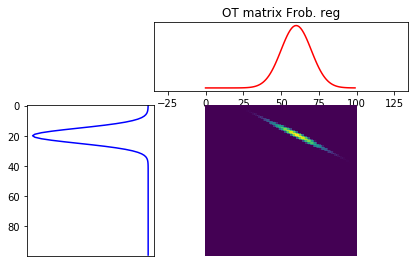

In [5]:
#%% Example with Frobenius norm regularization


def f(G):
    return 0.5 * np.sum(G**2)


def df(G):
    return G


reg = 1e-1

Gl2 = ot.optim.cg(a, b, M, reg, f, df, verbose=True)

pl.figure(3)
ot.plot.plot1D_mat(a, b, Gl2, 'OT matrix Frob. reg')

Solve EMD with entropic regularization
--------------------------------------



It.  |Loss        |Delta loss
--------------------------------
    0|1.692289e-01|0.000000e+00
    1|1.617643e-01|-4.614437e-02
    2|1.612639e-01|-3.102965e-03
    3|1.611291e-01|-8.371098e-04
    4|1.610468e-01|-5.110558e-04
    5|1.610198e-01|-1.672927e-04
    6|1.610130e-01|-4.232417e-05
    7|1.610090e-01|-2.513455e-05
    8|1.610002e-01|-5.443507e-05
    9|1.609996e-01|-3.657071e-06
   10|1.609948e-01|-2.998735e-05
   11|1.609695e-01|-1.569217e-04
   12|1.609533e-01|-1.010779e-04
   13|1.609520e-01|-8.043897e-06
   14|1.609465e-01|-3.415246e-05
   15|1.609386e-01|-4.898605e-05
   16|1.609324e-01|-3.837052e-05
   17|1.609298e-01|-1.617826e-05
   18|1.609184e-01|-7.080015e-05
   19|1.609083e-01|-6.273206e-05
It.  |Loss        |Delta loss
--------------------------------
   20|1.608988e-01|-5.940805e-05
   21|1.608853e-01|-8.380030e-05
   22|1.608844e-01|-5.185045e-06
   23|1.608824e-01|-1.279113e-05
   24|1.608819e-01|-3.156821e-06
   25|1.608783e-01|-2.205746e-05
   26|1.608764e-0

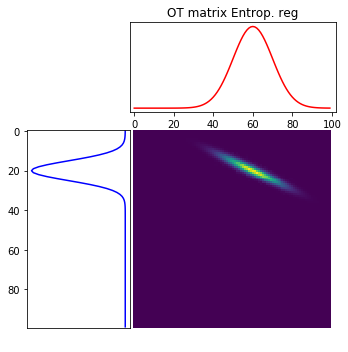

In [6]:
#%% Example with entropic regularization


def f(G):
    return np.sum(G * np.log(G))


def df(G):
    return np.log(G) + 1.


reg = 1e-3

Ge = ot.optim.cg(a, b, M, reg, f, df, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Ge, 'OT matrix Entrop. reg')

Solve EMD with Frobenius norm + entropic regularization
-------------------------------------------------------



It.  |Loss        |Delta loss
--------------------------------
    0|1.693084e-01|0.000000e+00
    1|1.610121e-01|-5.152589e-02
    2|1.609378e-01|-4.622297e-04
    3|1.609284e-01|-5.830043e-05
    4|1.609284e-01|-1.111407e-12


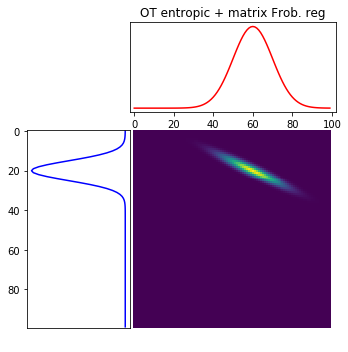

In [7]:
#%% Example with Frobenius norm + entropic regularization with gcg


def f(G):
    return 0.5 * np.sum(G**2)


def df(G):
    return G


reg1 = 1e-3
reg2 = 1e-1

Gel2 = ot.optim.gcg(a, b, M, reg1, reg2, f, df, verbose=True)

pl.figure(5, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gel2, 'OT entropic + matrix Frob. reg')
pl.show()